In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
np.set_printoptions(threshold='nan', precision=6, suppress=True)

## 1. Experiment 1

log:

/home/rigel/code_research/quantum_illumination/qillumi/run_expr_1.py

2017-11-19 18:03:49: 1 run_all_states(8, 0.1, 0.01, 0.01, (0.4, 0.4))	
2017-11-19 18:03:50: 2 run_all_states(24, 1.0, 0.01, 0.01, (0.4, 0.4))	
2017-11-19 18:04:18: 3 run_all_states(32, 10.0, 0.01, 0.01, (0.4, 0.4))	

In [65]:
df_one = pd.read_csv('../output/expr_1_basic_11-19.csv', comment='#')
df_one.fillna("", inplace=True)

In [155]:
df_one.head()

,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb
0,0.1,0.01,TMSS,0.099504,0.020000,0.056102,0.495279,0.499957,0.500273,0.010000,0.010000,,
1,0.1,0.01,PS,0.099504,0.039804,0.168732,0.490605,0.499839,0.500273,0.019902,0.019902,,
2,0.1,0.01,PA,0.099504,1.039804,0.168732,0.485689,0.499632,0.498223,0.519902,0.519902,,
3,0.1,0.01,PSA,0.099504,0.150064,0.439049,0.481975,0.499450,0.500273,0.075032,0.075032,,
4,0.1,0.01,PAS,0.099504,1.150064,0.439049,0.474331,0.498892,0.499102,0.575032,0.575032,,


### Plot

### 1.1 Helstrom bounds and Chernoff bounds for different states under different noise levels

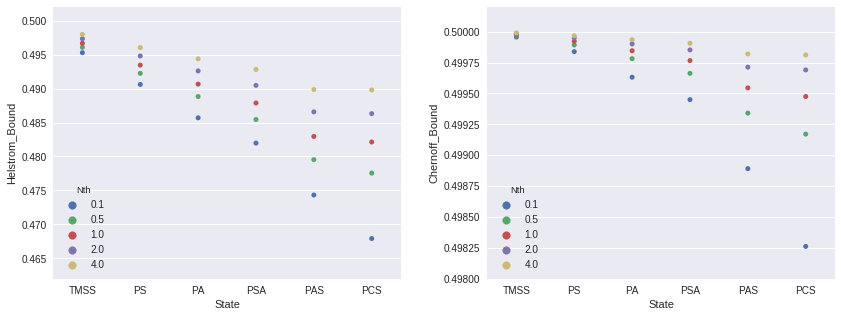

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sns.stripplot(x='State', y='Helstrom_Bound', hue='Nth', data=df_one, ax=ax1)
ax1.set_ylim(0.462, 0.502)
sns.stripplot(x='State', y='Chernoff_Bound', hue='Nth', data=df_one, ax=ax2)
ax2.set_ylim(0.498, 0.5002)
plt.subplots_adjust(wspace=0.25)

### 1.2 Helstrom bounds with repsect to entropy and average photon numbers

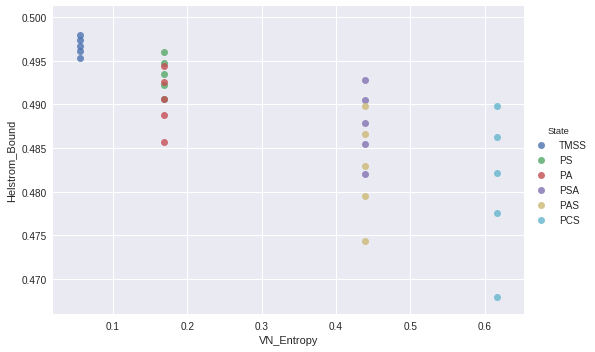

In [88]:
sns.lmplot(x='VN_Entropy', y='Helstrom_Bound', data=df_one, 
           hue='State', fit_reg=False, aspect=1.5)

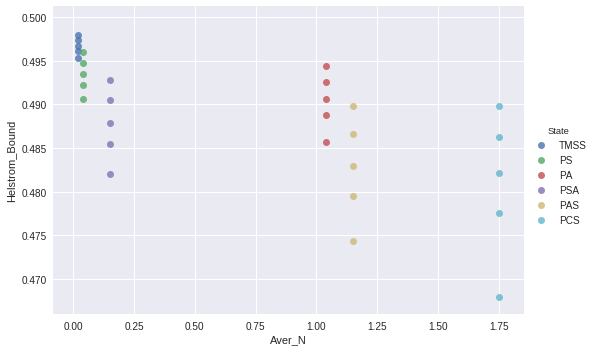

In [89]:
sns.lmplot(x='Aver_N', y='Helstrom_Bound', data=df_one, 
           hue='State', fit_reg=False, aspect=1.5)

### 1.3 Chernoff bounds with respect to measurement times

In [141]:
def upper_bound(QCB, M):
    """ Upper bound (Quantum Chernoff bound) of the error probability
        using s = 1/2
    """
    return 0.5 * QCB ** M

def calc_chernoff_data(df, Nth, states, xlow, xhigh, points):
    ms = np.logspace(xlow, xhigh, points)
    df = df[df['Nth'] == Nth]
    dict_temp = {}
    for name in states:
        qcb = df[df['State'] == name]['Chernoff_Bound'].values[0] * 2
        print("{}: {:.11f}".format(name, qcb))
        dict_temp[name] = [upper_bound(qcb, n) for n in ms]
    return pd.DataFrame(dict_temp, index=ms)

def plot_chernoff_data(df, ylow, yhigh):
    fig, ax = plt.subplots()
    df.plot(loglog=True, ax=ax)
    ax.set_ylim(ylow, yhigh)
    ax.set_xlabel("$\log_{10}M$")
    ax.set_ylabel("$\log_{10}P_{err}$")

In [150]:
states = ('TMSS', 'PS', 'PSA', 'PCS')
df01 = calc_chernoff_data(df_one, 0.1, states, 3, 6, 50)
df1 = calc_chernoff_data(df_one, 1.0, states, 3, 6, 50)
df4 = calc_chernoff_data(df_one, 4, states, 3, 6, 50)

TMSS: 0.99991419983
PS: 0.99967711216
PSA: 0.99890051570
PCS: 0.99652427632
TMSS: 0.99995632076
PS: 0.99984647112
PSA: 0.99953270662
PCS: 0.99895149025
TMSS: 0.99998026389
PS: 0.99993575013
PSA: 0.99981376592
PCS: 0.99962348595


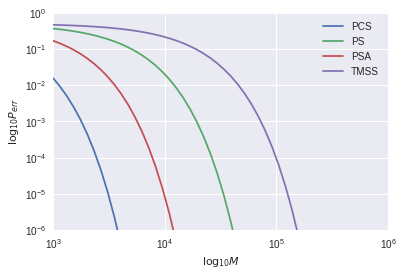

In [151]:
plot_chernoff_data(df01, 1e-6, 1)

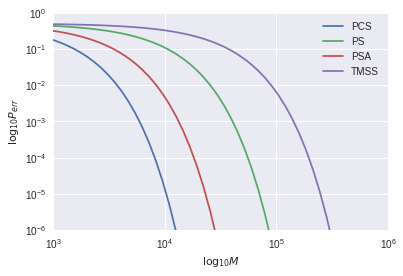

In [152]:
plot_chernoff_data(df1, 1e-6, 1)

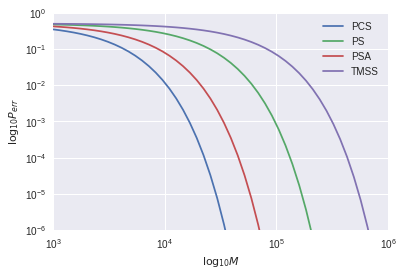

In [154]:
plot_chernoff_data(df4, 1e-6, 1)

## Experiment 2

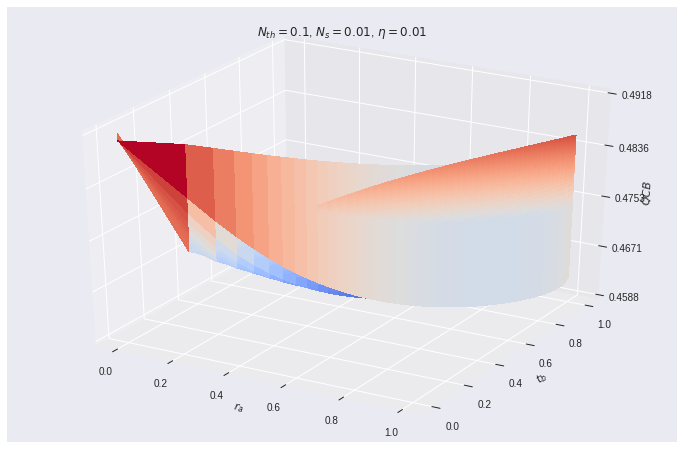

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

df_two = pd.read_csv('../output/expr_two_p51.csv')

RA = np.sqrt(np.linspace(0, 1, 51))
RB = np.sqrt(np.linspace(0, 1, 51))
RA, RB = np.meshgrid(RA, RB)
qcb_pcs = df_two['Helstrom'].values.reshape(RA.shape)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(RA, RB, qcb_pcs, \
                rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('$r_a$')
ax.set_ylabel('$t_b$')
ax.set_zlabel('$QCB$')
ax.set_title('$N_{th}=0.1$, $N_s=0.01$, $\eta=0.01$')

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# fig.colorbar(qcb_pcs, shrink=0.5, aspect=5)
plt.show()